In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SMA

In [19]:
df = yf.download('RELIANCE.NS',period='2y',interval='1d',auto_adjust=False)
SMA_50 = df.Close.rolling(50).mean()
SMA_200 = df.Close.rolling(200).mean()
df['SMA_50'] = SMA_50
df['SMA_200'] = SMA_200
df


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,,
2024-01-01,1285.609619,1295.125000,1303.425049,1286.574951,1290.275024,4030540,NaN,NaN
2024-01-02,1296.255859,1305.849976,1307.500000,1286.500000,1292.500000,7448800,NaN,NaN
2024-01-03,1282.160156,1291.650024,1317.000000,1288.599976,1305.000000,9037536,NaN,NaN
2024-01-04,1288.786011,1298.324951,1304.925049,1289.550049,1294.000000,9612778,NaN,NaN
2024-01-05,1294.270508,1303.849976,1309.925049,1299.000000,1301.449951,8086406,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-12-23,1570.699951,1570.699951,1580.900024,1568.099976,1580.900024,7506564,1510.836006,1414.709253
2025-12-24,1558.199951,1558.199951,1575.699951,1553.599976,1572.699951,8815745,1514.482004,1416.622253


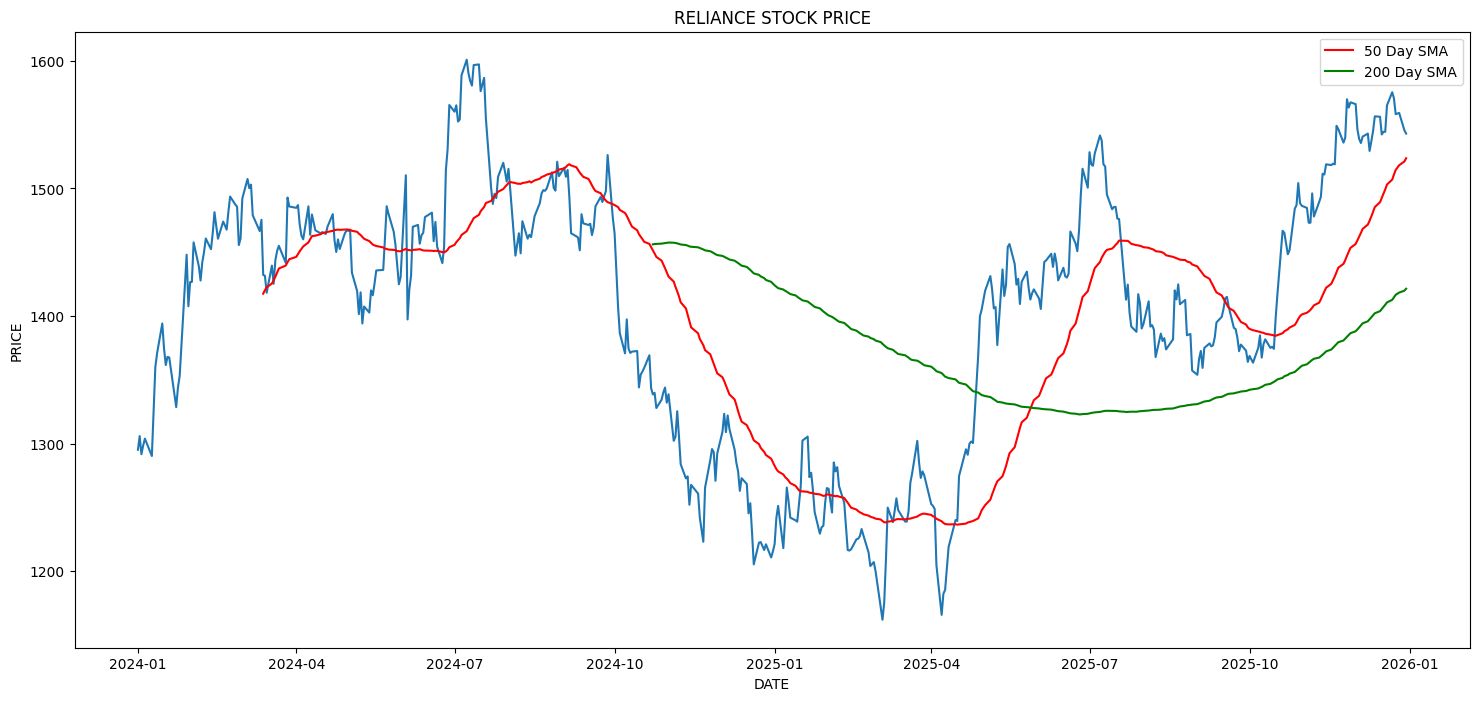

In [20]:
plt.figure(figsize=(18,8))
plt.ylabel('PRICE')
plt.xlabel('DATE')
plt.title('RELIANCE STOCK PRICE')
plt.plot(df['Close'])
plt.plot(df['SMA_50'],label='50 Day SMA',color='red') #The 50 day and 200 day SMAs are plotted only after sufficient was available.
plt.plot(df['SMA_200'],label='200 Day SMA',color='green') #No artificial adjustment was made to extend the SMA to the start of the series.
plt.legend()

GAP DATA


In [40]:
df_gap = df[['Close','Open']].copy()
df_gap['Close']=df_gap['Close'].shift(1)
df_gap['Gap_Up']=df_gap['Open']>df_gap['Close']
df_gap['Gap_Down']=df_gap['Open']<df_gap['Close']
df_gap

Price,Close,Open,Gap_Up,Gap_Down
Ticker,RELIANCE.NS,RELIANCE.NS,,
Date,,,,
2024-01-01,NaN,1290.275024,False,False
2024-01-02,1295.125000,1292.500000,False,True
2024-01-03,1305.849976,1305.000000,False,True
2024-01-04,1291.650024,1294.000000,True,False
2024-01-05,1298.324951,1301.449951,True,False
...,...,...,...,...
2025-12-23,1575.400024,1580.900024,True,False
2025-12-24,1570.699951,1572.699951,True,False


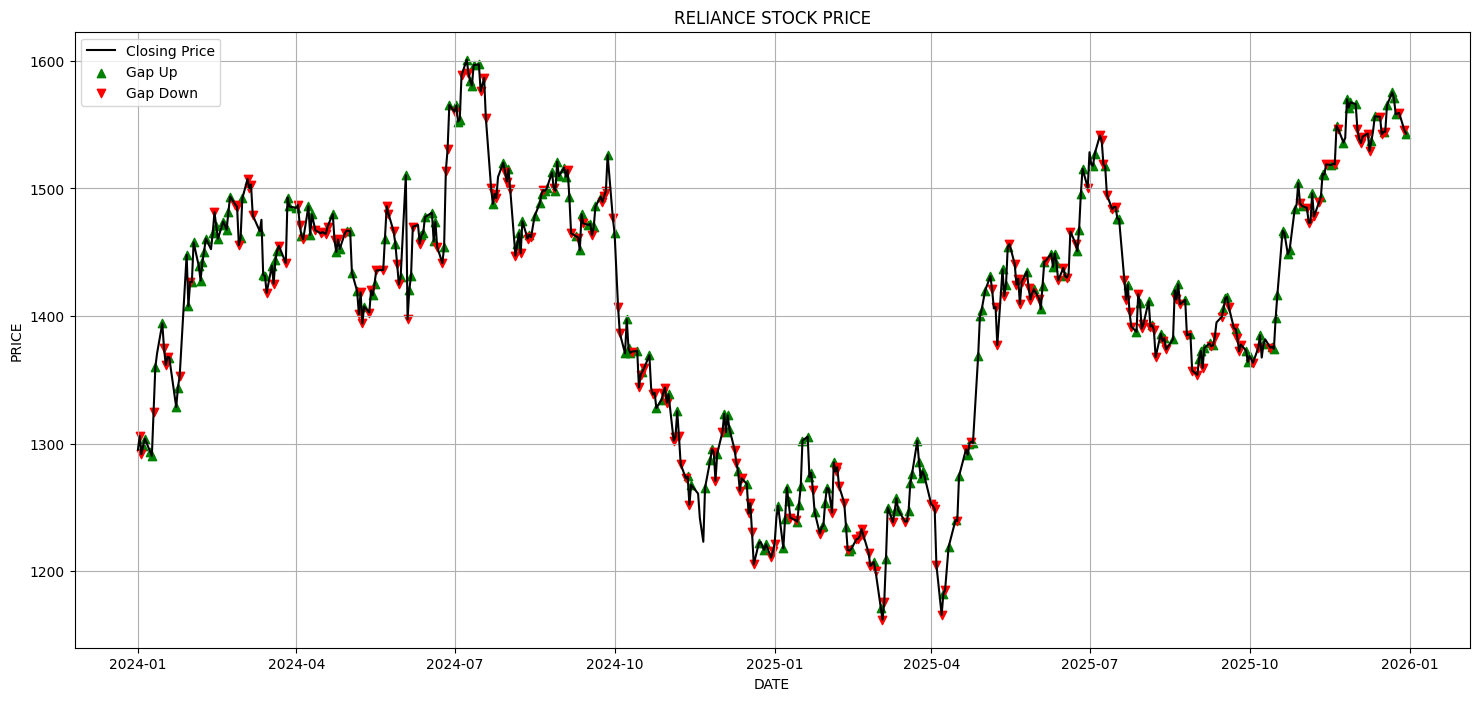

In [45]:
plt.figure(figsize=(18,8))
plt.ylabel('PRICE')
plt.xlabel('DATE')
plt.title('RELIANCE STOCK PRICE')
plt.plot(df['Close'],label='Closing Price',color='black')
plt.scatter(df_gap[df_gap['Gap_Up']].index,
            df.loc[df_gap['Gap_Up'], 'Close'],
            marker='^',color='green',label='Gap Up')
plt.scatter(df_gap[df_gap['Gap_Down']].index,
            df.loc[df_gap['Gap_Down'], 'Close'],
            marker='v',color='red',label='Gap Down')
plt.legend()
plt.grid()

VWAP


[*********************100%***********************]  1 of 1 completed


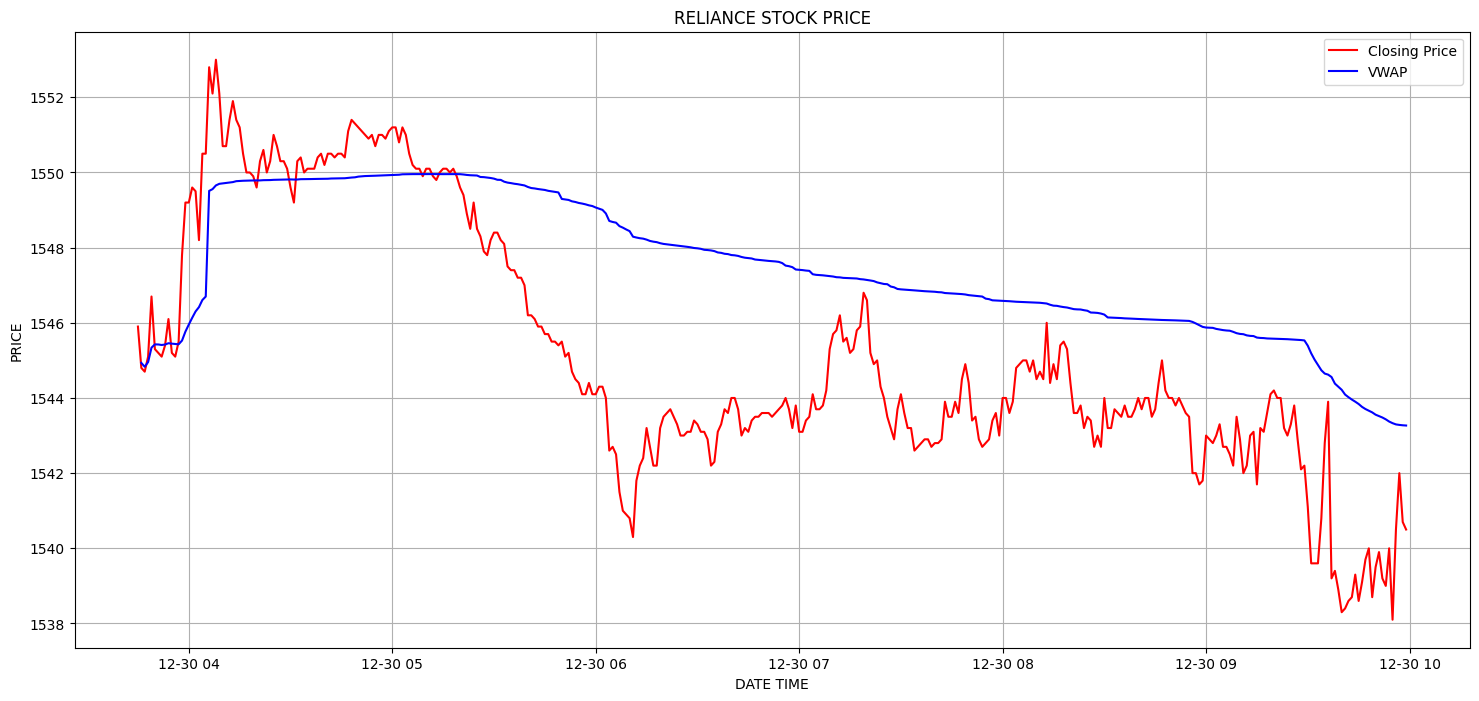

In [26]:
df_intra = yf.download ('RELIANCE.NS',period='1d',interval='1m',auto_adjust=False)

df_intra['VWAP'] = ((df_intra['High'] + df_intra['Low'] + df_intra['Close'])/3 * df_intra['Volume']).cumsum() / df_intra['Volume'].cumsum()

plt.figure(figsize=(18,8))
plt.ylabel('PRICE')
plt.xlabel('DATE TIME')
plt.title('RELIANCE STOCK PRICE')
plt.plot(df_intra['Close'],color ='red',label='Closing Price')
plt.plot(df_intra['VWAP'],color ='blue',label='VWAP')
plt.legend()
plt.grid()


In [44]:
df_tcs = yf.download('TCS.NS',start='2023-01-01',end='2024-01-01',interval='1d')
df_tcs.columns = df_tcs.columns.droplevel(1)

/tmp/ipython-input-2742523783.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tcs = yf.download('TCS.NS',start='2023-01-01',end='2024-01-01',interval='1d')
[*********************100%***********************]  1 of 1 completed


Bollinger Bands

In [52]:
def bollinger_bands(df, period):
  df['MB'] = df['Close'].rolling(period).mean()
  df['stdv']= df['Close'].rolling(period).std()
  df['UB'] = df['MB'] + df['stdv']*2
  df['LB'] = df['MB'] - df['stdv']*2
  del df['stdv']
  return df

df_tcs = bollinger_bands(df_tcs,20)
df_tcs

Price,Close,High,Low,Open,Volume,MB,UB,LB,RSI,MACD,Signal_line,MACD Signal,ADX,%k,%d
Date,,,,,,,,,,,,,,,
2023-01-02,2986.109375,2991.053626,2962.075472,2985.697410,709547,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
2023-01-03,3031.796631,3039.716284,2971.322712,2977.457035,1245178,NaN,NaN,NaN,100.000000,-3.644567,-0.728913,-2.915654,100.000000,NaN,NaN
2023-01-04,3034.817139,3046.445145,3008.769018,3027.538346,1231668,NaN,NaN,NaN,100.000000,-6.699416,-1.923014,-4.776402,100.000000,NaN,NaN
2023-01-05,3031.567383,3055.555458,3004.878177,3049.054771,1826057,NaN,NaN,NaN,99.417152,-8.757230,-3.289857,-5.467373,100.000000,NaN,NaN
2023-01-06,2940.421875,3022.823819,2929.846914,3021.404630,2488376,NaN,NaN,NaN,84.535137,-2.998813,-3.231648,0.232835,94.071673,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3626.119141,3646.933246,3567.327460,3603.361071,2413058,3453.240637,3712.510692,3193.970583,68.619669,-86.798507,-71.166474,-15.632033,36.081656,75.363760,69.533321
2023-12-26,3599.141357,3635.601635,3594.020653,3622.183949,1285231,3469.287439,3722.601983,3215.972895,64.933251,-85.068133,-73.946806,-11.121328,37.059335,66.955660,69.829599
2023-12-27,3613.981445,3620.619216,3573.016966,3602.412806,1293976,3485.457532,3731.935736,3238.979328,66.014835,-83.926815,-75.942807,-7.984007,37.488774,67.814347,70.044589


RSI

In [46]:
def rsi(df, period):
  delta = df['Close'].diff()
  gain = delta.clip(lower=0)
  loss = -delta.clip(upper=0)

  avg_gain = gain.ewm(alpha=1/period, adjust=False).mean()
  avg_loss = loss.ewm(alpha=1/period, adjust=False).mean()

  rs = avg_gain / avg_loss
  df['RSI'] = 100 - (100 / (1 + rs))
  return df

df_tcs = rsi(df_tcs,14)
df_tcs

Price,Close,High,Low,Open,Volume,MB,stdv,UB,LB,RSI
Date,,,,,,,,,,
2023-01-02,2986.109375,2991.053626,2962.075472,2985.697410,709547,NaN,NaN,NaN,NaN,NaN
2023-01-03,3031.796631,3039.716284,2971.322712,2977.457035,1245178,NaN,NaN,NaN,NaN,100.000000
2023-01-04,3034.817139,3046.445145,3008.769018,3027.538346,1231668,NaN,NaN,NaN,NaN,100.000000
2023-01-05,3031.567383,3055.555458,3004.878177,3049.054771,1826057,NaN,NaN,NaN,NaN,99.417152
2023-01-06,2940.421875,3022.823819,2929.846914,3021.404630,2488376,NaN,NaN,NaN,NaN,84.535137
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3626.119141,3646.933246,3567.327460,3603.361071,2413058,3453.240637,129.635027,3712.510692,3193.970583,68.619669
2023-12-26,3599.141357,3635.601635,3594.020653,3622.183949,1285231,3469.287439,126.657272,3722.601983,3215.972895,64.933251
2023-12-27,3613.981445,3620.619216,3573.016966,3602.412806,1293976,3485.457532,123.239102,3731.935736,3238.979328,66.014835


MACD

In [51]:

def macd(df, long_period,short_period,signal_period):
    df['long_ema']=df['Close'].ewm(span=long_period,adjust=False).mean()
    df['short_ema']=df['Close'].ewm(span=short_period,adjust=False).mean()
    df['MACD']=df['long_ema']-df['short_ema']
    df['Signal_line']=df['MACD'].ewm(span=signal_period,adjust=False).mean()
    df['MACD Signal'] = df['MACD'] - df['Signal_line']
    del df['long_ema'], df['short_ema']
    return df

df_tcs = macd(df_tcs,26,12,9)
df_tcs

Price,Close,High,Low,Open,Volume,MB,stdv,UB,LB,RSI,MACD,Signal_line,MACD Signal,ADX,%k,%d
Date,,,,,,,,,,,,,,,,
2023-01-02,2986.109375,2991.053626,2962.075472,2985.697410,709547,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
2023-01-03,3031.796631,3039.716284,2971.322712,2977.457035,1245178,NaN,NaN,NaN,NaN,100.000000,-3.644567,-0.728913,-2.915654,100.000000,NaN,NaN
2023-01-04,3034.817139,3046.445145,3008.769018,3027.538346,1231668,NaN,NaN,NaN,NaN,100.000000,-6.699416,-1.923014,-4.776402,100.000000,NaN,NaN
2023-01-05,3031.567383,3055.555458,3004.878177,3049.054771,1826057,NaN,NaN,NaN,NaN,99.417152,-8.757230,-3.289857,-5.467373,100.000000,NaN,NaN
2023-01-06,2940.421875,3022.823819,2929.846914,3021.404630,2488376,NaN,NaN,NaN,NaN,84.535137,-2.998813,-3.231648,0.232835,94.071673,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3626.119141,3646.933246,3567.327460,3603.361071,2413058,3453.240637,129.635027,3712.510692,3193.970583,68.619669,-86.798507,-71.166474,-15.632033,36.081656,75.363760,69.533321
2023-12-26,3599.141357,3635.601635,3594.020653,3622.183949,1285231,3469.287439,126.657272,3722.601983,3215.972895,64.933251,-85.068133,-73.946806,-11.121328,37.059335,66.955660,69.829599
2023-12-27,3613.981445,3620.619216,3573.016966,3602.412806,1293976,3485.457532,123.239102,3731.935736,3238.979328,66.014835,-83.926815,-75.942807,-7.984007,37.488774,67.814347,70.044589


Average Directional Index

In [55]:
def adx(df,period):
  alpha = 1/period
  df['H-L'] = df['High'] - df['Low']
  df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
  df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
  df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
  del df['H-L'], df['H-C'], df['L-C']

  df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

  df['H-pH'] = df['High'] - df['High'].shift(1)
  df['pL-L'] = df['Low'].shift(1) - df['Low']
  df['+DX'] = np.where((df['H-pH'] > df['pL-L']) & (df['H-pH']>0),df['H-pH'],0.0)
  df['-DX'] = np.where((df['H-pH'] < df['pL-L']) & (df['pL-L']>0),df['pL-L'],0.0)
  del df['H-pH'], df['pL-L']

  df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
  df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
  df['+DMI'] = (df['S+DM']/df['ATR'])*100
  df['-DMI'] = (df['S-DM']/df['ATR'])*100
  del df['S+DM'], df['S-DM']

  df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
  df['ADX'] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
  del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX']

  return df

df_tcs = adx(df_tcs,14)
df_tcs

Price,Close,High,Low,Open,Volume,MB,UB,LB,RSI,MACD,...,%k,%d,RSI_buy,RSI_sell,BB_buy,BB_sell,MACD_buy,MACD_sell,+DMI,-DMI
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,2986.109375,2991.053626,2962.075472,2985.697410,709547,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,False,False,False,False,False,False,0.000000,0.000000
2023-01-03,3031.796631,3039.716284,2971.322712,2977.457035,1245178,NaN,NaN,NaN,100.000000,-3.644567,...,NaN,NaN,False,True,False,False,False,True,10.932737,0.000000
2023-01-04,3034.817139,3046.445145,3008.769018,3027.538346,1231668,NaN,NaN,NaN,100.000000,-6.699416,...,NaN,NaN,False,True,False,False,False,True,11.511423,0.000000
2023-01-05,3031.567383,3055.555458,3004.878177,3049.054771,1826057,NaN,NaN,NaN,99.417152,-8.757230,...,NaN,NaN,False,True,False,False,False,True,12.209388,0.000000
2023-01-06,2940.421875,3022.823819,2929.846914,3021.404630,2488376,NaN,NaN,NaN,84.535137,-2.998813,...,NaN,NaN,False,True,False,False,True,False,9.899410,13.955575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3626.119141,3646.933246,3567.327460,3603.361071,2413058,3453.240637,3712.510692,3193.970583,68.619669,-86.798507,...,75.363760,69.533321,False,False,False,False,False,True,39.329729,13.190733
2023-12-26,3599.141357,3635.601635,3594.020653,3622.183949,1285231,3469.287439,3722.601983,3215.972895,64.933251,-85.068133,...,66.955660,69.829599,False,False,False,False,False,True,37.628992,12.620326
2023-12-27,3613.981445,3620.619216,3573.016966,3602.412806,1293976,3485.457532,3731.935736,3238.979328,66.014835,-83.926815,...,67.814347,70.044589,False,False,False,False,False,True,35.724414,14.214838


Stochastic Oscillator

In [50]:
def SO(df,k_period,d_period):
  df['H_high'] = df['High'].rolling(k_period).max()
  df['L_low'] = df['Low'].rolling(k_period).min()

  df['%k'] = (df['Close'] - df['L_low'])*100/(df['H_high'] - df['L_low'])
  df['%d'] = df['%k'].rolling(d_period).mean()
  del df['H_high'], df['L_low']
  return df

df_tcs=SO(df_tcs,14,3)
df_tcs

Price,Close,High,Low,Open,Volume,MB,stdv,UB,LB,RSI,long_ema,short_ema,MACD,Signal_line,MACD Signal,ADX,%k,%d
Date,,,,,,,,,,,,,,,,,,
2023-01-02,2986.109375,2991.053626,2962.075472,2985.697410,709547,NaN,NaN,NaN,NaN,NaN,2986.109375,2986.109375,0.000000,0.000000,0.000000,NaN,NaN,NaN
2023-01-03,3031.796631,3039.716284,2971.322712,2977.457035,1245178,NaN,NaN,NaN,NaN,100.000000,2989.493616,2993.138184,-3.644567,-0.728913,-2.915654,100.000000,NaN,NaN
2023-01-04,3034.817139,3046.445145,3008.769018,3027.538346,1231668,NaN,NaN,NaN,NaN,100.000000,2992.850914,2999.550331,-6.699416,-1.923014,-4.776402,100.000000,NaN,NaN
2023-01-05,3031.567383,3055.555458,3004.878177,3049.054771,1826057,NaN,NaN,NaN,NaN,99.417152,2995.718801,3004.476031,-8.757230,-3.289857,-5.467373,100.000000,NaN,NaN
2023-01-06,2940.421875,3022.823819,2929.846914,3021.404630,2488376,NaN,NaN,NaN,NaN,84.535137,2991.622732,2994.621545,-2.998813,-3.231648,0.232835,94.071673,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3626.119141,3646.933246,3567.327460,3603.361071,2413058,3453.240637,129.635027,3712.510692,3193.970583,68.619669,3453.435706,3540.234213,-86.798507,-71.166474,-15.632033,36.081656,75.363760,69.533321
2023-12-26,3599.141357,3635.601635,3594.020653,3622.183949,1285231,3469.287439,126.657272,3722.601983,3215.972895,64.933251,3464.228717,3549.296851,-85.068133,-73.946806,-11.121328,37.059335,66.955660,69.829599
2023-12-27,3613.981445,3620.619216,3573.016966,3602.412806,1293976,3485.457532,123.239102,3731.935736,3238.979328,66.014835,3475.321512,3559.248327,-83.926815,-75.942807,-7.984007,37.488774,67.814347,70.044589


Average True Range

In [60]:
def ATR(df,period):
  alpha = 1/period
  df['H-L'] = df['High'] - df['Low']
  df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
  df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
  df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
  del df['H-L'], df['H-C'], df['L-C']

  df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()
  return df

df_tcs = ATR(df_tcs, 14)
df_tcs

Price,Close,High,Low,Open,Volume,MB,UB,LB,RSI,MACD,...,MACD_buy,MACD_sell,+DMI,-DMI,ADX_buy,ADX_sell,SO_buy,SO_sell,TR,ATR
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,2986.109375,2991.053626,2962.075472,2985.697410,709547,NaN,NaN,NaN,NaN,0.000000,...,False,False,0.000000,0.000000,False,False,False,False,28.978154,28.978154
2023-01-03,3031.796631,3039.716284,2971.322712,2977.457035,1245178,NaN,NaN,NaN,100.000000,-3.644567,...,False,True,10.932737,0.000000,True,False,False,False,68.393572,31.793541
2023-01-04,3034.817139,3046.445145,3008.769018,3027.538346,1231668,NaN,NaN,NaN,100.000000,-6.699416,...,False,True,11.511423,0.000000,True,False,False,False,37.676127,32.213726
2023-01-05,3031.567383,3055.555458,3004.878177,3049.054771,1826057,NaN,NaN,NaN,99.417152,-8.757230,...,False,True,12.209388,0.000000,True,False,False,False,50.677281,33.532551
2023-01-06,2940.421875,3022.823819,2929.846914,3021.404630,2488376,NaN,NaN,NaN,84.535137,-2.998813,...,True,False,9.899410,13.955575,False,True,False,False,101.720469,38.403117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3626.119141,3646.933246,3567.327460,3603.361071,2413058,3453.240637,3712.510692,3193.970583,68.619669,-86.798507,...,False,True,39.329729,13.190733,True,False,False,False,79.605786,70.767980
2023-12-26,3599.141357,3635.601635,3594.020653,3622.183949,1285231,3469.287439,3722.601983,3215.972895,64.933251,-85.068133,...,False,True,37.628992,12.620326,True,False,False,False,41.580982,68.683194
2023-12-27,3613.981445,3620.619216,3573.016966,3602.412806,1293976,3485.457532,3731.935736,3238.979328,66.014835,-83.926815,...,False,True,35.724414,14.214838,True,False,False,False,47.602250,67.177412


Question 2

In [61]:
def rsi_signal(df):
    df['RSI_buy'] = df['RSI'] < 30
    df['RSI_sell'] = df['RSI'] > 70
    return df
def bb_signal(df):
    df['BB_buy'] = df['Close'] < df['LB']
    df['BB_sell'] = df['Close'] > df['UB']
    return df
def macd_signal(df):
    df['MACD_buy'] = df['MACD'] > df['Signal_line']
    df['MACD_sell'] = df['MACD'] < df['Signal_line']
    return df
def adx_signal(df):
    df['ADX_buy']  = (df['ADX'] > 25) & (df['+DMI'] > df['-DMI'])
    df['ADX_sell'] = (df['ADX'] > 25) & (df['-DMI'] > df['+DMI'])

    return df
def so_signal(df):
    df['SO_buy']  = df['%k'] < 20
    df['SO_sell'] = df['%k'] > 80

    return df
def atr_signal(df):
    df['ATR_buy'] = (df['Close'] > df['Close'].shift(1)) & (df['ATR'] > df['ATR'].shift(1))
    df['ATR_sell'] = (df['Close'] < df['Close'].shift(1)) & (df['ATR'] > df['ATR'].shift(1))
    return df
df_tcs = rsi_signal(df_tcs)
df_tcs = bb_signal(df_tcs)
df_tcs = macd_signal(df_tcs)
df_tcs = adx_signal(df_tcs)
df_tcs = so_signal(df_tcs)
df_tcs = atr_signal(df_tcs)
df_tcs
print("RSI Buy:", df_tcs['RSI_buy'].sum())
print("RSI Sell:", df_tcs['RSI_sell'].sum())
print("BB Buy:", df_tcs['BB_buy'].sum())
print("BB Sell:", df_tcs['BB_sell'].sum())
print("MACD Buy:", df_tcs['MACD_buy'].sum())
print("MACD Sell:", df_tcs['MACD_sell'].sum())
print("ADX Buy:", df_tcs['ADX_buy'].sum())
print("ADX Sell:", df_tcs['ADX_sell'].sum())
print("SO Buy:", df_tcs['SO_buy'].sum())
print("SO Sell:", df_tcs['SO_sell'].sum())
print("ATR Buy:", df_tcs['ATR_buy'].sum())
print("ATR Sell:", df_tcs['ATR_sell'].sum())


RSI Buy: 1
RSI Sell: 40
BB Buy: 6
BB Sell: 14
MACD Buy: 106
MACD Sell: 138
ADX Buy: 61
ADX Sell: 34
SO Buy: 48
SO Sell: 72
ATR Buy: 50
ATR Sell: 51
